In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import cv2
import numpy as np
import os
from tqdm import tqdm
import math

In [2]:
video_name = []

for path,dirs,files in os.walk('./dfl-bundesliga-data-shootout/train/'):
    for file in files:
        fullname = os.path.join(path,file).split('/')[-1]
        video_name.append(fullname)

df = pd.DataFrame(video_name, columns=['video_name'])

In [3]:
# creating tags for training videos
video_tag = []

for i in range(df.shape[0]):
    video_tag.append(df['video_name'][i].split('_')[0])
    
df['tag'] = video_tag

In [4]:
df

,video_name,tag
0,challenge\challenge_1606b0e6_0_1052.63_1055.90...,challenge\challenge
1,challenge\challenge_1606b0e6_0_1074.9422116052...,challenge\challenge
2,challenge\challenge_1606b0e6_0_1076.35_1079.31...,challenge\challenge
3,challenge\challenge_1606b0e6_0_1194.9477235462...,challenge\challenge
4,challenge\challenge_1606b0e6_0_1379.3221846588...,challenge\challenge
...,...,...
4377,throwin\throwin_ecf251d4_0_433.12465035382553_...,throwin\throwin
4378,throwin\throwin_ecf251d4_0_487.7619110172926_4...,throwin\throwin
4379,throwin\throwin_ecf251d4_0_501.867_505.9903672...,throwin\throwin
4380,throwin\throwin_ecf251d4_0_781.5104562934944_7...,throwin\throwin


In [5]:
from glob import glob

In [6]:
glob("./dfl-bundesliga-data-shootout/train/**/*.mp4", recursive=True)


['./dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1052.63_1055.90623798895.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1074.9422116052842_1078.03.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1076.35_1079.3108669560006.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1194.9477235462411_1197.4477235462411.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1379.3221846588851_1381.8221846588851.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1429.899592111251_1433.67.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1430.8300000000002_1434.105106699092.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1436.59_1439.8740205809872.mp4',
 './dfl-bundesliga-data-shootout/train\\challenge\\challenge_1606b0e6_0_1503.188807004356_1505.688807004356.mp4',
 './dfl-bundeslig

In [9]:
import cv2
import math
import os
import glob
from tqdm import tqdm

# Asegurarse de que el directorio train_1 existe
if not os.path.exists('train_1'):
    os.makedirs('train_1')

# Obtener la lista de todos los archivos .mp4 en el directorio train y sus subcarpetas
video_files = glob.glob("./dfl-bundesliga-data-shootout/train/**/*.mp4", recursive=True)

# Procesar cada video
for videoFile in tqdm(video_files):
    count = 0
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            # Usamos el nombre base del video para evitar conflictos con las rutas de las subcarpetas
            filename = 'train_1/' + os.path.basename(videoFile) + "_frame%d.jpg" % count
            count += 1
            cv2.imwrite(filename, frame)
    cap.release()



  0%|          | 0/4382 [00:00<?, ?it/s]

100%|██████████| 4382/4382 [56:35<00:00,  1.29it/s]


In [38]:
# getting the names of all the images
images = glob.glob("./train_1/*.jpg")
train_image = []
train_class = []

for i in tqdm(range(len(images))):
    # Dividir el path del archivo basado en el separador de sistema operativo
    path_parts = images[i].split(os.path.sep)
    
    # creating the image name
    image_name = path_parts[-1]  # tomar el último elemento después de dividir
    train_image.append(image_name)
    
    # creating the class of image
    class_name = image_name.split('_')[0]
    train_class.append(class_name)
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('train_new.csv',header=True, index=False)


100%|██████████| 14972/14972 [00:00<00:00, 1069834.06it/s]


In [39]:
first_image_path = glob.glob("./train_1/*.jpg")[0]
class_name = first_image_path.split('\\')[1].split('_')[0]
print(class_name)


challenge


In [40]:
train = pd.read_csv('train_new.csv')
train.head()

,image,class
0,challenge_1606b0e6_0_1052.63_1055.90623798895....,challenge
1,challenge_1606b0e6_0_1052.63_1055.90623798895....,challenge
2,challenge_1606b0e6_0_1052.63_1055.90623798895....,challenge
3,challenge_1606b0e6_0_1052.63_1055.90623798895....,challenge
4,challenge_1606b0e6_0_1074.9422116052842_1078.0...,challenge


In [41]:
train.shape

(14972, 2)

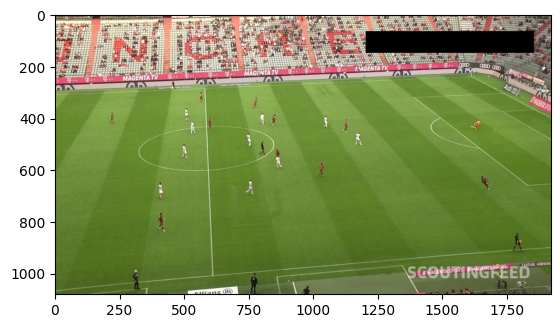

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("./train_1/" + train.loc[0,'image'])
imgplot = plt.imshow(img)
#plt.show()

### Transformar Imagenes en arrays de numpy y guardar sus valores

In [44]:
train_split = train.sample(n=3000).reset_index(drop=True)
train_split.shape

(3000, 2)

In [45]:
train_split['class'].value_counts()

play         2491
challenge     390
throwin       119
Name: class, dtype: int64

In [46]:
train_split.to_csv("train_split.csv", index=False)

In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# creating an empty list
train_image = []

# for loop to read and store frames
for i in tqdm(range(train_split.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    img = load_img('./train_1/'+train_split['image'][i], target_size=(224,224,3))
    # converting it to array
    img = img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 3000/3000 [01:22<00:00, 36.27it/s]


(3000, 224, 224, 3)

In [49]:
import pickle

with open('X.pkl','wb') as f:
    pickle.dump(X, f)

### Preparar data para predecir

In [56]:
import os
import glob

file_path = glob.glob("./dfl-bundesliga-data-shootout/test/*.mp4")[31]
file_path.split(os.path.sep)[1]


'fdf84965_1.mp4'

In [55]:
len(glob.glob("./dfl-bundesliga-data-shootout/test/*.mp4"))


32

In [63]:
import cv2
import math
import glob
import os
from tqdm import tqdm

# Asegurarse de que el directorio train_1 existe
if not os.path.exists('test_1'):
    os.makedirs('test_1')

# Obtener la lista de videos
video_files = glob.glob("./dfl-bundesliga-data-shootout/test/*.mp4")

# Storing the frames from test videos
for i in tqdm(range(len(video_files))):
    count = 0
    videoFile = video_files[i].split(os.path.sep)[1]
    cap = cv2.VideoCapture(os.path.join("./dfl-bundesliga-data-shootout/test", videoFile))  # capturing the video from the given path
    frameRate = cap.get(5)  # frame rate
    while cap.isOpened():
        frameId = cap.get(1)  # current frame number
        ret, frame = cap.read()
        if not ret:
            break
        if frameId % math.floor(frameRate) == 0:
            # storing the frames in a new folder named test_1
            filename = 'test_1/' + videoFile + "_frame%d.jpg" % count
            count += 1
            cv2.imwrite(filename, frame)
    cap.release()


100%|██████████| 32/32 [02:20<00:00,  4.40s/it]


In [64]:
glob.glob("./test_1/*.jpg")

['./test_1\\019d5b34_0.mp4_frame0.jpg',
 './test_1\\019d5b34_0.mp4_frame1.jpg',
 './test_1\\019d5b34_0.mp4_frame10.jpg',
 './test_1\\019d5b34_0.mp4_frame11.jpg',
 './test_1\\019d5b34_0.mp4_frame12.jpg',
 './test_1\\019d5b34_0.mp4_frame13.jpg',
 './test_1\\019d5b34_0.mp4_frame14.jpg',
 './test_1\\019d5b34_0.mp4_frame15.jpg',
 './test_1\\019d5b34_0.mp4_frame16.jpg',
 './test_1\\019d5b34_0.mp4_frame17.jpg',
 './test_1\\019d5b34_0.mp4_frame18.jpg',
 './test_1\\019d5b34_0.mp4_frame19.jpg',
 './test_1\\019d5b34_0.mp4_frame2.jpg',
 './test_1\\019d5b34_0.mp4_frame20.jpg',
 './test_1\\019d5b34_0.mp4_frame21.jpg',
 './test_1\\019d5b34_0.mp4_frame22.jpg',
 './test_1\\019d5b34_0.mp4_frame23.jpg',
 './test_1\\019d5b34_0.mp4_frame24.jpg',
 './test_1\\019d5b34_0.mp4_frame25.jpg',
 './test_1\\019d5b34_0.mp4_frame26.jpg',
 './test_1\\019d5b34_0.mp4_frame27.jpg',
 './test_1\\019d5b34_0.mp4_frame28.jpg',
 './test_1\\019d5b34_0.mp4_frame29.jpg',
 './test_1\\019d5b34_0.mp4_frame3.jpg',
 './test_1\\019d5b34

In [67]:

# getting the names of all the images
images = glob.glob("./test_1/*.jpg")
test_image = []

for i in tqdm(range(len(images))):
    # creating the image name
    test_image.append(images[i].split('/')[1])
    
# storing the images and their class in a dataframe
predict_data = pd.DataFrame()
predict_data['image'] = test_image

# converting the dataframe into csv file 
predict_data.to_csv('predict_new.csv',header=True, index=False)

100%|██████████| 960/960 [00:00<00:00, 972592.23it/s]


In [68]:
predict_data.shape

(960, 1)

In [77]:
# creating an empty list
predict_image = []

# for loop to read and store frames
for i in tqdm(range(predict_data.shape[0])):
    # Use the image path directly from the dataframe
    img_path = predict_data['image'][i]
    
    # loading the image and keeping the target size as (224,224,3)
    img = load_img(img_path, target_size=(224,224,3))
    # converting it to array
    img = img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    predict_image.append(img)
    
# converting the list to numpy array
X_predict = np.array(predict_image)

# shape of the array
X_predict.shape


100%|██████████| 960/960 [00:16<00:00, 58.05it/s]


(960, 224, 224, 3)

In [78]:
import pickle

with open('X_predict.pkl','wb') as f:
    pickle.dump(X_predict, f)